# Pandas 라이브러리
- Panel datas의 약자
- Series : index + value 가 1:1로 대응되는 데이터
- DataFrame : 행과 열을 가지는 표와 같은 형태의 데이터
- Series가 모여 DataFrame이 된다

In [2]:
# pandas 라이브러리 호출, pd라 별칭
import pandas as pd

In [3]:
# Series -> index + value로 구성된 형태
# dtype은 value 값의 타입
population = pd.Series([9668465,3391946,2942828,1450062])
print(population)

0    9668465
1    3391946
2    2942828
3    1450062
dtype: int64


In [4]:
# 인덱스 이름을 지정하여 Series 생성하기
# 인덱스와 값이 1:1로 일치해야 함!! =>아니라면 오류 
# population = pd.Series([9668465,3391946,2942828,1450062], index=["서울","부산","인천","광주","목포"])
population = pd.Series([9668465,3391946,2942828,1450062], index=["서울","부산","인천","광주"])
print(population)


서울    9668465
부산    3391946
인천    2942828
광주    1450062
dtype: int64


### Series 데이터 확인
- 각각 numpy 배열로 이루어짐
- .values
- .index

In [5]:
# Series 데이터들의 값은 넘파이 배열의 형태!!

# Series의 값만 확인
print(population.values)
print(type(population.values))

# Series의 인덱스만 확인
# 'object => 일반 문자열 의미
print(population.index)

[9668465 3391946 2942828 1450062]
<class 'numpy.ndarray'>
Index(['서울', '부산', '인천', '광주'], dtype='object')


### Series에 이름을 지정 (데이터에 정보를 나타내기)

In [6]:
# Series 데이터의 이름 지정하기
# 데이터의 정보를 나타내기 위해서!!
population.name = "인구"

# 인덱스에 이름 붙여주기
population.index.name = "도시"

print(population)

도시
서울    9668465
부산    3391946
인천    2942828
광주    1450062
Name: 인구, dtype: int64


### Series 데이터 구조의 연산

In [7]:
# Series데이터 구조는 넘파이 배열의 형태
# 즉 연산이 가능!!

# 모든 요소에 대해 연산이 진행된다!
print(population/1000000)

도시
서울    9.668465
부산    3.391946
인천    2.942828
광주    1.450062
Name: 인구, dtype: float64


### Series 인덱싱, 슬라이싱

In [8]:
population = pd.Series([9668465,3391946,2942828,1450062], index=["서울","부산","인천","광주"])
print(population)

서울    9668465
부산    3391946
인천    2942828
광주    1450062
dtype: int64


In [9]:
# 인덱싱 : 부산의 인구수 가져오기
# 인덱스 번호, 인덱스의 이름으로도 추출 가능
print(population[1])
print(population["부산"])


3391946
3391946


In [10]:
# 인덱싱을 활용하여 여러개의 데이터를 추축ㄹ
# 서울, 광주, 부산 데이터 가져오기 (동시에, 순서 맞춰서)
# 여러개 데이터 인덱싱 : 리스트[]
print(population[[0, 3, 1]])
print()
print(population[["서울", "광주", "부산"]])

서울    9668465
광주    1450062
부산    3391946
dtype: int64

서울    9668465
광주    1450062
부산    3391946
dtype: int64


In [11]:
print(population[[2, 0]])
print()
print(population[["인천", "서울"]])

인천    2942828
서울    9668465
dtype: int64

인천    2942828
서울    9668465
dtype: int64


- 슬라이싱

In [12]:
print(population)

서울    9668465
부산    3391946
인천    2942828
광주    1450062
dtype: int64


In [13]:
# Series명[ 시작인덱스:끝인덱스+1 ]
# 부산~인천
print(population[1:3])
print()
print(population["부산":"인천"])
# 인덱스 이름으로 슬라이싱 진행 시 +1 개념이 없으므로 가져오고자 하는 이름을 작성

부산    3391946
인천    2942828
dtype: int64

부산    3391946
인천    2942828
dtype: int64


- 불리언 인덱싱 : 원하는 조건에 해당하는 데이터를 가져올 때 사용
    - 출력하고 싶은 데이터[조건식]

In [14]:
# 인구가 250만 이상인 도시만 출력
print(population[population.values>=2500000])
print(population[population>=2500000])

서울    9668465
부산    3391946
인천    2942828
dtype: int64
서울    9668465
부산    3391946
인천    2942828
dtype: int64


In [15]:
# 인구가 250만 이상 500만 이하의 도시 출력 -> 부산,인천
# and, or
# 다중조건인 경우 반드시우선순위를 지정
#! and or 예약어 사용XX => and == &, or == |
population[(population>=2500000) & (population<=5000000)]

부산    3391946
인천    2942828
dtype: int64

### 딕셔너리 데이터타입을 활용해서 Series 생성하기
- key 값은 index
- value 값은 value

In [16]:
# 포켓몬 : 능력치
data = {"잠만보":9631,
        "롱스톤":3393,
        "잉어킹":1490,
        "오박사":0}
pokemon = pd.Series(data)

print(pokemon)

잠만보    9631
롱스톤    3393
잉어킹    1490
오박사       0
dtype: int64


In [17]:
# 레벨업한 데이터가 들어있는 pokemon_up
# key값은 동일해야 함!!! 다르면 인식 XX
data2 = {"잠만보":9999,
        "롱스톤":5000,
        "전룡":6000,
        "성원숭":1}
pokemon_up = pd.Series(data2)

print(pokemon_up)

잠만보    9999
롱스톤    5000
전룡     6000
성원숭       1
dtype: int64


In [18]:
# 올라간 능력치 계산
up = pokemon_up - pokemon
print(up)
#* 인덱스명이 달랐을 때 Series연산 진행 결과 --> NaN이라는 값 출력(결측치)

롱스톤    1607.0
성원숭       NaN
오박사       NaN
잉어킹       NaN
잠만보     368.0
전룡        NaN
dtype: float64


- 결측치(NaN)가 있는 Sreies 데이터 처리하는 방법

In [19]:
# 비어있지 않은 데이터들만 보고싶다면?
#*       => notnull()
print(up.notnull())
# 비어있지 않은 데이터만 출력  --> 불리언 인덱싱
print(up[up.notnull()])

롱스톤     True
성원숭    False
오박사    False
잉어킹    False
잠만보     True
전룡     False
dtype: bool
롱스톤    1607.0
잠만보     368.0
dtype: float64


In [20]:
# 비어있는 데이터만 보고 싶다면
#*       ---> isnull()
print(up.isnull())
print()
# 빈 데이터만 인덱싱하여 출력
print(up[up.isnull()])


롱스톤    False
성원숭     True
오박사     True
잉어킹     True
잠만보    False
전룡      True
dtype: bool

성원숭   NaN
오박사   NaN
잉어킹   NaN
전룡    NaN
dtype: float64


In [21]:
# 레벨업해서 올라간 공격력의 증가율(%) 계산해보기
# ((올라간 데이터(pokemon_up)-원 데이터)/ 원 데이터) * 100
ch=((pokemon_up-pokemon)/pokemon)*100
print(ch)
print()
# 비어있지 않은 값만 출력
print(ch[ch.notnull()])

롱스톤    47.362216
성원숭          NaN
오박사          NaN
잉어킹          NaN
잠만보     3.820995
전룡           NaN
dtype: float64

롱스톤    47.362216
잠만보     3.820995
dtype: float64


### Series 데이터 갱신 추가 삭제 방법

In [22]:
# ch 데이터로 실습

#* Series 데이터 추가하는 방법
# 기존에 없던 인덱스 명칭 활용하여 값 추가
#^ Series명["추가하고싶은 인덱스명"] = 값
ch["파이리"] = 55

In [23]:
#* Series 데이터 수정하는 방법
# 기존에 있던 인덱스 명칭 활용하여 값 수정
#^ Series명["수정할 인덱스명"] = 값
ch["오박사"] = 50
print(ch)

롱스톤    47.362216
성원숭          NaN
오박사    50.000000
잉어킹          NaN
잠만보     3.820995
전룡           NaN
파이리    55.000000
dtype: float64


In [24]:
# 삭제하는 방법
#^ del
del ch["전룡"]
del ch["잉어킹"]
print(ch)

롱스톤    47.362216
성원숭          NaN
오박사    50.000000
잠만보     3.820995
파이리    55.000000
dtype: float64


# DataFrame
- 행과 열로 구성 된 표와 같은 형태
- Series 데이터 구조가 모여서 생성
- 2차원 데이터

- 딕셔너리 활용하여 DataFrame 생성하기

In [2]:
data = {'2020': [9668465,3391946,2942828,1450062],
       '2010':[10312545,3567910,2758296,1454636]}
df = pd.DataFrame(data)

print(df)
# 키 값 -> column, value -> vlaues
# index 자동 지정!

      2020      2010
0  9668465  10312545
1  3391946   3567910
2  2942828   2758296
3  1450062   1454636


In [3]:
pd.DataFrame(data)

,2020,2010
0,9668465,10312545
1,3391946,3567910
2,2942828,2758296
3,1450062,1454636


In [4]:
salt_bread = {'롸야붕에게' : '존맛탱', '영주에게' : '개이득', '친구는' : '능력자'}

df_salt_bread = pd.DataFrame(salt_bread, index=[0, 1, 2])
sr_salt_bread = pd.Series(salt_bread)
sr_salt_bread.index.name = '소금빵'
sr_salt_bread

소금빵
롸야붕에게    존맛탱
영주에게     개이득
친구는      능력자
dtype: object

In [5]:
# 데이터 프레임의 인덱스 명칭 바꿔주기
df.index = ["서울","부산","인천","광주"]
df

,2020,2010
서울,9668465,10312545
부산,3391946,3567910
인천,2942828,2758296
광주,1450062,1454636


In [6]:
# list 자료구조를 활용해서 DataFrame 생성하기
data = [[9668465,3391946,2942828,1450062], [10312545,3567910,2758296,1454636]]
ind = ["2020", "2010"]
col = ["서울","부산","인천","광주"]

df2 = pd.DataFrame(data, index=ind, columns=col)
print(df2)

            서울       부산       인천       광주
2020   9668465  3391946  2942828  1450062
2010  10312545  3567910  2758296  1454636


In [7]:
#! 데이터프레임 전치 시키는 방법 => 행과 열의 위치 바꿔주는 방법

df2.T
# 전치는 데이터의 구조변경이기 때문에 다시한번 대입해 주어야 적용된다

df2 = df2.T

### 데이터 구조 확인하기 (속성들 확인)
- values : 값(데이터) 확인하기
- index : 인덱스 확인하기
- columns : 컬럼 확인하기

In [8]:
# DataFrame 값만 확인하는 방법
print(df2.values)
print()
# DataFrame 인덱스만 확인하는 방법
print(df2.index)
print()
# DataFrame 컬럼만 확인하는 방법
print(df2.columns)

[[ 9668465 10312545]
 [ 3391946  3567910]
 [ 2942828  2758296]
 [ 1450062  1454636]]

Index(['서울', '부산', '인천', '광주'], dtype='object')

Index(['2020', '2010'], dtype='object')


### DataFrame 인덱싱 & 슬라이싱

In [9]:
df

,2020,2010
서울,9668465,10312545
부산,3391946,3567910
인천,2942828,2758296
광주,1450062,1454636


In [10]:
# 2020년도 데이터 인덱싱
# 변수명[컬럼명]

print(df["2020"])
# Series 형태로 데이터가 출력된다
print()
print(df["2020"][0:2])

서울    9668465
부산    3391946
인천    2942828
광주    1450062
Name: 2020, dtype: int64

서울    9668465
부산    3391946
Name: 2020, dtype: int64


In [11]:
# 하나의 컬럼을 가져올 때 DataFrame 형태로 보고싶다면?
print(df[["2020"]])

# 2020년, 2010년 두개의 데이터를 가져오고 싶다면(인덱싱)
print(df[["2020","2010"]])

       2020
서울  9668465
부산  3391946
인천  2942828
광주  1450062
       2020      2010
서울  9668465  10312545
부산  3391946   3567910
인천  2942828   2758296
광주  1450062   1454636


In [12]:
data3 = {'2020':[9668465,3391946,2942828,1450062],
        '2010' :[10312545,3567910,2758296,1454636],
         '2005':[9762546,3512547,2517680,1456016]
        }
df3 = pd.DataFrame(data3,index = ['서울','부산','인천','광주'])
df3

,2020,2010,2005
서울,9668465,10312545,9762546
부산,3391946,3567910,3512547
인천,2942828,2758296,2517680
광주,1450062,1454636,1456016


#### DataFram의 인덱싱은 열, 슬라이싱은 행 단위로 이루어짐!!

In [13]:
# 인덱싱 --> 열(컬럼) 단위로 데이터가 가져와짐!!

# 슬라이싱  --> 행 단위로 데이터가 가져와짐!!

print(df3[0:2])

       2020      2010     2005
서울  9668465  10312545  9762546
부산  3391946   3567910  3512547


In [14]:
# 슬라이싱 범위 --> 컬럼명으로 주면?  ==> 오류

# print(df3["2020":"2010"])

In [15]:
# 슬라이싱 진행시 지정한 인덱스 이름으로도 가능
# 범위는 +1 안줘도 됨

print(df2["서울":"부산"])

       2020      2010
서울  9668465  10312545
부산  3391946   3567910


In [16]:
print(df3[["2010","2005"]])
print()
print(df3[["2010","2005"]][2:])

        2010     2005
서울  10312545  9762546
부산   3567910  3512547
인천   2758296  2517680
광주   1454636  1456016

       2010     2005
인천  2758296  2517680
광주  1454636  1456016


### 인덱서
- 행과 열 단위로 슬라이싱 하고 싶을 때 사용한다
- loc : 실제 인덱스명 or 컬럼명을 사용
- iloc : 인덱스 번호를 사용

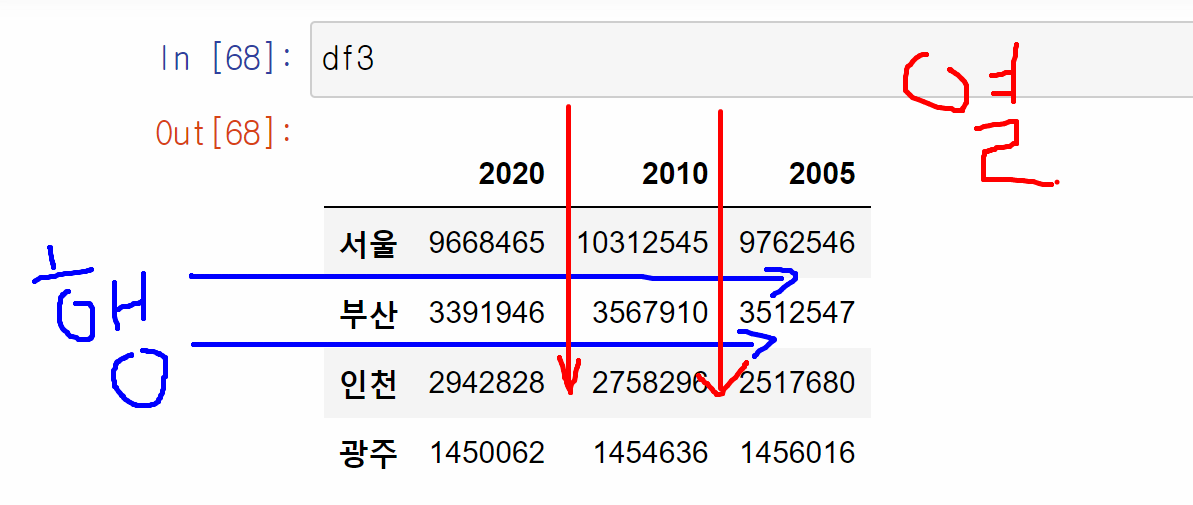

In [17]:
#^ DataFrame에서 행과 열 단위로 슬라이싱 하고 싶을떄는 인덱서 활용
# 변수명.loc[ 행 , 열 ]   ( 행과 열 슬라이싱!! )
print(df3.loc["부산":"인천","2010":"2005"])

print()

# iloc:인덱스 번호를 가지고 슬라이싱 가능!!
print(df3.iloc[1:3,1:])

       2010     2005
부산  3567910  3512547
인천  2758296  2517680

       2010     2005
부산  3567910  3512547
인천  2758296  2517680


### 불리언 인덱싱
- 데이터[조건]
- 조건 데이터는 boolean 형태로 표현되는 식 작성
- 조건이 True 인 값만 출력

In [18]:
# 2010년 데이터 중 인구가 250만 이상인 데이터만 출력

print(df3)

print()
print(df3["2010"]>=2500000)
print(df3["2010"][df3["2010"]>=2500000])
print()
# 비교대상을 전체 프레임으로 설정하면
# 조건이 True인 인덱스들의 모든 열 데이터 출력
print(df3[df3["2010"]>=2500000])

print()
print(df3.loc[:,"2010"][df3.loc[:,"2010"]>=2500000])

print()
print(df3.iloc[:,1][df3.iloc[:,1]>=2500000])

       2020      2010     2005
서울  9668465  10312545  9762546
부산  3391946   3567910  3512547
인천  2942828   2758296  2517680
광주  1450062   1454636  1456016

서울     True
부산     True
인천     True
광주    False
Name: 2010, dtype: bool
서울    10312545
부산     3567910
인천     2758296
Name: 2010, dtype: int64

       2020      2010     2005
서울  9668465  10312545  9762546
부산  3391946   3567910  3512547
인천  2942828   2758296  2517680

서울    10312545
부산     3567910
인천     2758296
Name: 2010, dtype: int64

서울    10312545
부산     3567910
인천     2758296
Name: 2010, dtype: int64


In [19]:
print(df3[df3["2010"]>=2600000])
# 2005년의 인천은 조건에 맞지 않지만 조건이 2010년이기 때문에 출력됨

       2020      2010     2005
서울  9668465  10312545  9762546
부산  3391946   3567910  3512547
인천  2942828   2758296  2517680


In [20]:
print(df3)

       2020      2010     2005
서울  9668465  10312545  9762546
부산  3391946   3567910  3512547
인천  2942828   2758296  2517680
광주  1450062   1454636  1456016


In [21]:
# 2020년 데이터가 300만 이상인 데이터 출력 
print(df3["2020"][df3["2020"]>=3000000])
# 2020년 데이터가 300만 이상인 데이터 출력 (모든 열 출력)
print(df3[df3["2020"]>=3000000])
print()
# 전체 데이터에서 350만 이상인 데이터 출력
print(df3>=3500000)
print()
print(df3[df3>=3500000])

# DataFrame에서 불리언 인덱싱을 했을 때 조건이 False인 값은 결측치(NaN)으로 출력

서울    9668465
부산    3391946
Name: 2020, dtype: int64
       2020      2010     2005
서울  9668465  10312545  9762546
부산  3391946   3567910  3512547

     2020   2010   2005
서울   True   True   True
부산  False   True   True
인천  False  False  False
광주  False  False  False

         2020        2010       2005
서울  9668465.0  10312545.0  9762546.0
부산        NaN   3567910.0  3512547.0
인천        NaN         NaN        NaN
광주        NaN         NaN        NaN


In [22]:
print(df3)

       2020      2010     2005
서울  9668465  10312545  9762546
부산  3391946   3567910  3512547
인천  2942828   2758296  2517680
광주  1450062   1454636  1456016


In [30]:
# [행, 열]
print(df3.loc["부산":"인천","2020":"2010"])
print()
print(df3.iloc[1:3,:2])

       2020     2010
부산  3391946  3567910
인천  2942828  2758296

       2020     2010
부산  3391946  3567910
인천  2942828  2758296


### DataFrame 행,열 추가, 수정, 삭제

In [65]:
data = {'2020':[9668465,3391946,2942828,1450062],
        '2010' :[10312545,3567910,2758296,1454636]
        }

df = pd.DataFrame(data)
print(df)

      2020      2010
0  9668465  10312545
1  3391946   3567910
2  2942828   2758296
3  1450062   1454636


In [66]:
df.index = ["서울","부산","인천","광주"]
df

,2020,2010
서울,9668465,10312545
부산,3391946,3567910
인천,2942828,2758296
광주,1450062,1454636


In [67]:
#^ 새로운 컬럼 추가
# [추가하고 싶은 컬럼 이름 ] = 값
df['2005'] = [9762546, 3512547,2517570, 1456016]
print(df)

       2020      2010     2005
서울  9668465  10312545  9762546
부산  3391946   3567910  3512547
인천  2942828   2758296  2517570
광주  1450062   1454636  1456016


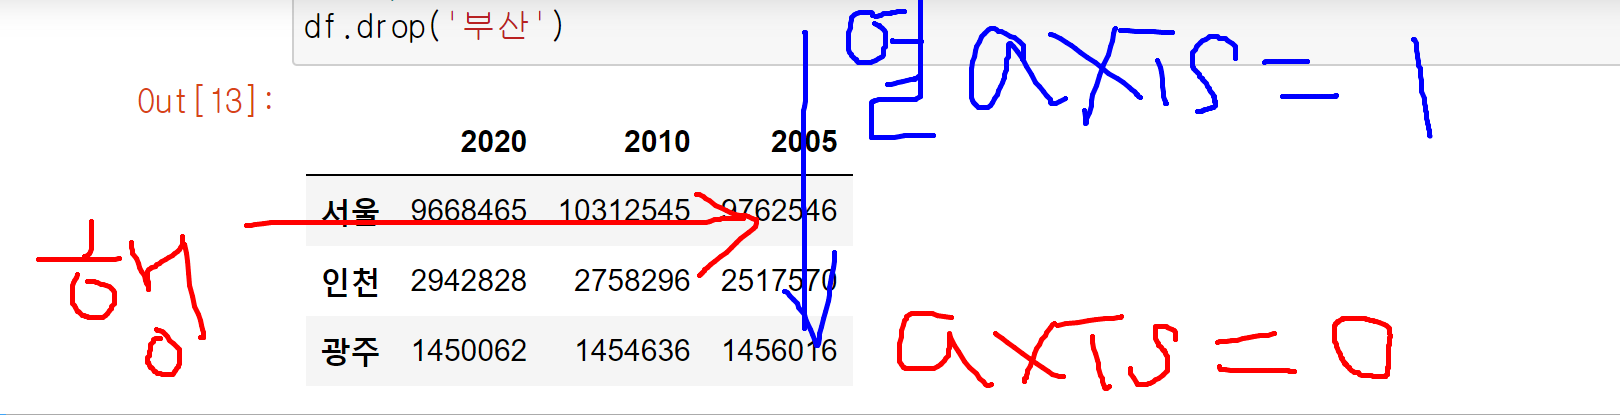

In [68]:
# 데이터 프레임 행단위 삭제하기
# drop
# df = df.drop("부산")
df.drop("부산")
print(df)
# drop 삭제기능은 삭제한 결과를 다시 df에 대입해줘야 적용이 된다!
# 매번 대입하지 않고 코드 실행시 바로적용하고 싶다면
# drop(inplace 속성 사용)
df.drop("부산", inplace=True)
print(df)

# 데이터 프레임 열단위 삭제하기
# drop
df.drop("2005", axis=1)
df = df.drop("2005", axis=1)


# drop이라는 삭제 기능 사용시 축 설정을 해주지 않으면 오류가 난다.
# 축 (axis) : 행은 0 / 열은 1
# 기본값이 행으로 설정되었기때문에 행단위삭제는 안써줘도 가능하지만
# 열단위 삭제는 축 설정을 변경헤줘야 한다! axis=1

       2020      2010     2005
서울  9668465  10312545  9762546
부산  3391946   3567910  3512547
인천  2942828   2758296  2517570
광주  1450062   1454636  1456016
       2020      2010     2005
서울  9668465  10312545  9762546
인천  2942828   2758296  2517570
광주  1450062   1454636  1456016


- 삭제 : drop()
- 1.삭제 후 df에 대입
- 2. ( ,inplace = True) 속성을 활용하여 저장


In [69]:
# DataFrame 수정 (열 이름 수정)
# df.rename(columns={ 기존컬럼명 : 수정할컬럼명 })
df.rename(columns={"2010":"2000"}, inplace=True)
print(df)

       2020      2000
서울  9668465  10312545
인천  2942828   2758296
광주  1450062   1454636


In [70]:
# DataFrame 수정 (행 이름 수정)
# df.rename(index={ 기존컬럼명 : 수정할컬럼명 })
df.rename(index={"인천":"대구"}, inplace=True)
print(df)

       2020      2000
서울  9668465  10312545
대구  2942828   2758296
광주  1450062   1454636


In [71]:
# DataFrame 데이터 수정 

df.iloc[1,0] = 0
print(df)


       2020      2000
서울  9668465  10312545
대구        0   2758296
광주  1450062   1454636


In [72]:
print(df.iloc[1:2,0:1])

    2020
대구     0


In [77]:
# csv파일 읽어오기
pd.read_csv("./population.csv")
# 컬럼 중 하나를 인덱스로 지정할 수 있음
population = pd.read_csv("./population.csv", index_col="도시")
population

,지역,2020,2015,2010,2005
도시,,,,,
서울,수도권,9668465,10022181.0,10312545.0,10167344
부산,경상권,3391946,NaN,NaN,3628293
인천,수도권,2942828,2925815.0,NaN,2600495
광주,전라권,1450062,1474636.0,1454636.0,1401745
대구,경상권,2418436,2466052.0,2431774.0,2456016


In [78]:
# 인구데이터
# 4개의 연도, 5개의 도시, 지역 포함
print(population)

     지역     2020        2015        2010      2005
도시                                                
서울  수도권  9668465  10022181.0  10312545.0  10167344
부산  경상권  3391946         NaN         NaN   3628293
인천  수도권  2942828   2925815.0         NaN   2600495
광주  전라권  1450062   1474636.0   1454636.0   1401745
대구  경상권  2418436   2466052.0   2431774.0   2456016


In [80]:
# 정렬하기
# 확인용

# 인덱스 값 기준 정렬
print(population.sort_index())

# 인덱스 기준으로 ㄱ,ㄴ,ㄷ... 순으로 졍렬, 오름차순

     지역     2020        2015        2010      2005
도시                                                
광주  전라권  1450062   1474636.0   1454636.0   1401745
대구  경상권  2418436   2466052.0   2431774.0   2456016
부산  경상권  3391946         NaN         NaN   3628293
서울  수도권  9668465  10022181.0  10312545.0  10167344
인천  수도권  2942828   2925815.0         NaN   2600495


In [83]:
# 데이터를 기준으로 정렬 -> 하나의 컬럼을 가져와 정렬
# 1. 정렬은 기본 오름차순
# 2. 결측치는 제일 하단으로 (의미 없는 데이터)

print(population["2010"].sort_values())


도시
광주     1454636.0
대구     2431774.0
서울    10312545.0
부산           NaN
인천           NaN
Name: 2010, dtype: float64


In [85]:
# 내림차순 정렬
# ascending : 오름차순
# 결측치는 제일 하단으로 (의미 없는 데이터)
print(population["2010"].sort_values(ascending=False))

도시
서울    10312545.0
대구     2431774.0
광주     1454636.0
부산           NaN
인천           NaN
Name: 2010, dtype: float64


In [89]:
# 전체 DataFrame으로 정렬?
# by="기준컬럼", 오름차순, 모든 행 같이 정렬

print(population.sort_values(by="2010"))
# by라는 속성에 어떤 값을 기준으로 정렬하는지 적어줘야 한다

     지역     2020        2015        2010      2005
도시                                                
광주  전라권  1450062   1474636.0   1454636.0   1401745
대구  경상권  2418436   2466052.0   2431774.0   2456016
서울  수도권  9668465  10022181.0  10312545.0  10167344
부산  경상권  3391946         NaN         NaN   3628293
인천  수도권  2942828   2925815.0         NaN   2600495


In [103]:
print(population.sort_values(by=["지역", "2020"]))

# 지역은 내림차순, 년도는 오름차순으로 정렬하고 싶다면?
print(population.sort_values(by=["지역", "2020"], ascending=[False, True]))


     지역     2020        2015        2010      2005
도시                                                
대구  경상권  2418436   2466052.0   2431774.0   2456016
부산  경상권  3391946         NaN         NaN   3628293
인천  수도권  2942828   2925815.0         NaN   2600495
서울  수도권  9668465  10022181.0  10312545.0  10167344
광주  전라권  1450062   1474636.0   1454636.0   1401745
     지역     2020        2015        2010      2005
도시                                                
광주  전라권  1450062   1474636.0   1454636.0   1401745
인천  수도권  2942828   2925815.0         NaN   2600495
서울  수도권  9668465  10022181.0  10312545.0  10167344
대구  경상권  2418436   2466052.0   2431774.0   2456016
부산  경상권  3391946         NaN         NaN   3628293


- count 함수

In [105]:
# 각 행,열별 데이터의 개수를 세주는 함수
# 결측치를 제외한 개수를 출력
# 축 설정의 기준 ~끼리,
#^^ 2020년의 행 끼리, 지역의 행 끼리 count됨

print(population.count())

지역      5
2020    5
2015    4
2010    3
2005    5
dtype: int64


In [109]:
# 몇개의 열이 있는지 확인
# 축 설정 반드시 해줘야 한다
#^^ axis=1 => 열을 count

print(population.count(axis=1))

5
도시
서울    5
부산    3
인천    4
광주    5
대구    5
dtype: int64


- fillna 함수

In [112]:
# fillna: 변수명.fillna(value=값)
# 결측치를 원하는 값으로 바꿔주는 함수

population = population.fillna(value=0)
print(population)
# 결측치끼리 연산은 결측치로 출력되기 때문!!
# 결측치의 연산은 결측치(NaN)가 되므로 연산에 활용을 위해 자주 쓰임

# 바로 적용되지 않기 떄문에 ( 대입 or inplace 속성 )<- 처리 해줘야 함

     지역     2020        2015        2010      2005
도시                                                
서울  수도권  9668465  10022181.0  10312545.0  10167344
부산  경상권  3391946         0.0         0.0   3628293
인천  수도권  2942828   2925815.0         0.0   2600495
광주  전라권  1450062   1474636.0   1454636.0   1401745
대구  경상권  2418436   2466052.0   2431774.0   2456016


In [23]:
# score 파일 불러오기 -> score 변수에 담기
# "과목" 컬럼은 인덱스로 가져오기
score = pd.read_csv("score.csv", index_col="과목", encoding = 'euc-kr')
score

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
DB,76,92,45,69
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26


In [24]:
#
#* 읽어올 파일의 인코딩 정보를 확인하는 코드
#^ 확인하고 싶은 파일 이름을 변경해서 사용
import chardet
import pandas as pd
filename = "score.csv"
with open(filename, 'rb') as f:
    result = chardet.detect(f.readline())  # or read() if the file is small.
    print(result['encoding'])

EUC-KR


In [25]:
# pandas에서도 범용 함수 사용 가능
# 널리 쓰이는 수학적 함수, sum(), max(), mean()...

# 학급별 점수 총 합 구하기

# 변수명.범용함수() / 변수명.sum()
print(score.sum())

# 학급별 점수합계 순위 (높은 반부터 위로 출력) --> 내림차순
print(score.sum().sort_values(ascending=False))

1반    271
2반    388
3반    295
4반    243
dtype: int64
2반    388
3반    295
1반    271
4반    243
dtype: int64


In [26]:
# 과목별 합계 구하기
print(score.sum(axis=1))

과목
파이썬    201
DB     282
자바     253
크롤링    298
Web    163
dtype: int64


In [27]:
score["합계"] = score.sum(axis=1)
score

,1반,2반,3반,4반,합계
과목,,,,,
파이썬,45,44,73,39,201
DB,76,92,45,69,282
자바,47,92,45,69,253
크롤링,92,81,85,40,298
Web,11,79,47,26,163


In [28]:
score.iloc[:,:4].mean(axis=1)

과목
파이썬    50.25
DB     70.50
자바     63.25
크롤링    74.50
Web    40.75
dtype: float64

In [29]:
# Q2. 과목별 평균을 계산하여 ["평균"]컬럼 추가하기

score["평균"] = score.iloc[:,:4].mean(axis=1)
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
파이썬,45,44,73,39,201,50.25
DB,76,92,45,69,282,70.50
자바,47,92,45,69,253,63.25
크롤링,92,81,85,40,298,74.50
Web,11,79,47,26,163,40.75


In [30]:
# Q3 반별 평균을 계산해서 "반평균" 행 추가
#^^ 행 추가하는 방법 : score.loc["반평균", :] = 값

# 행 인덱싱 --> 인덱서

# score.loc["반평균"] = score.iloc[:,:4].mean()
score.loc["반평균"] = score.mean()
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
파이썬,45.0,44.0,73.0,39.0,201.0,50.25
DB,76.0,92.0,45.0,69.0,282.0,70.50
자바,47.0,92.0,45.0,69.0,253.0,63.25
크롤링,92.0,81.0,85.0,40.0,298.0,74.50
Web,11.0,79.0,47.0,26.0,163.0,40.75
반평균,54.2,77.6,59.0,48.6,239.4,59.85


In [31]:
# 의미없는 2개의 데이터 슬라이싱
# 슬라이싱 한 데이터의 자리를 수정! => '-'

score.iloc[-1,-2:] = '-'
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
파이썬,45.0,44.0,73.0,39.0,201.0,50.25
DB,76.0,92.0,45.0,69.0,282.0,70.5
자바,47.0,92.0,45.0,69.0,253.0,63.25
크롤링,92.0,81.0,85.0,40.0,298.0,74.5
Web,11.0,79.0,47.0,26.0,163.0,40.75
반평균,54.2,77.6,59.0,48.6,-,-


In [34]:
# Q4 과목의 최대점수와 최소점수의 차이를 구해보자
maxScore = score.max(axis=1)
minScore = score.min(axis=1)
ch = maxScore - minScore
ch[:5]


C:\Users\SMHRD\AppData\Local\Temp\ipykernel_16636\517006522.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  maxScore = score.max(axis=1)
C:\Users\SMHRD\AppData\Local\Temp\ipykernel_16636\517006522.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  minScore = score.min(axis=1)


과목
파이썬    34.0
DB     47.0
자바     47.0
크롤링    52.0
Web    68.0
dtype: float64

In [38]:
# Q4 반 내에서 최대점수와 최소점수의 차이를 구해보자
maxS = score.iloc[:,:5].max()
minS = score.iloc[:,:5].min()
ch = maxS - minS
ch

C:\Users\SMHRD\AppData\Local\Temp\ipykernel_16636\2855829824.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  maxS = score.iloc[:,:5].max()
C:\Users\SMHRD\AppData\Local\Temp\ipykernel_16636\2855829824.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  minS = score.iloc[:,:5].min()


1반    81.0
2반    48.0
3반    40.0
4반    43.0
dtype: float64

### apply() 함수
- 행 or 열 단위로 복잡한 함수를 사용하고 싶을 때 사용
- 데이터 처리 시 동일한 데이터에 동일 행위 반복시 사용
- df.apply ( 함수명, axis= 0 or 1 )
- pandas(Series, DataFrame) 객체에게 동일 함수를 적용하고 싶을 때 사용

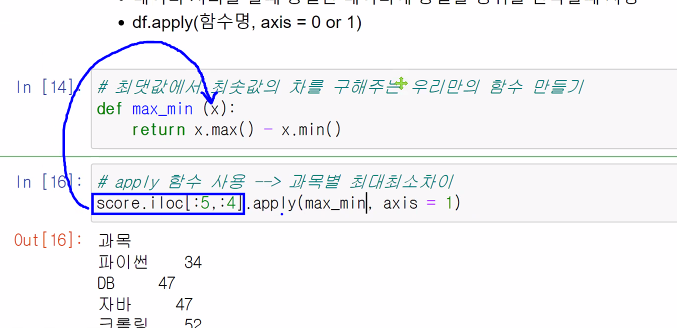

In [40]:
# 최대값에서 최소값의 차를 구해주는 함수 만들기
def max_min (x):
    return x.max() - x.min()

In [44]:
# apply 함수 사용  --> 과목별 최대, 최소 차이
score.iloc[:5,:4].apply(max_min, axis=1)

# 반별 최대, 최소 차이
score.iloc[:5,:4].apply(max_min)

1반    81.0
2반    48.0
3반    40.0
4반    43.0
dtype: float64

- apply 함수 추가 예제

In [101]:
date_list = [{'yyyy-mm-dd': '2003-03-13'},
            {'yyyy-mm-dd': '2017-10-20'},
            {'yyyy-mm-dd': '2023-02-24'}]
date_df = pd.DataFrame(date_list)

In [102]:
s1 = "안녕하세요 오늘은 즐거운 금요일입니다"
s1.split(" ")

['안녕하세요', '오늘은', '즐거운', '금요일입니다']

In [103]:
print(date_df)

   yyyy-mm-dd
0  2003-03-13
1  2017-10-20
2  2023-02-24


In [128]:
date_df.iloc[0][0]
a = (date_df.iloc[1])
# print(a[0])
date_df.iloc[0][0].split('-')[0]

date_df["yyyy-mm-dd"]
# for문을 돌리지 않아도 출력됨

0    2003-03-13
1    2017-10-20
2    2023-02-24
Name: yyyy-mm-dd, dtype: object

In [123]:
def year(x):
    return x.split('-')[0]

In [125]:
a = date_df["yyyy-mm-dd"].apply(year)

In [126]:
date_df["year"] = a

In [127]:
date_df

,yyyy-mm-dd,year
0,2003-03-13,2003
1,2017-10-20,2017
2,2023-02-24,2023


### 카테고리 생성하기
- 카테고리란? 범주화

In [135]:
# 나이데이터로 카테고리 생성하기
# 1. 데이터 준비
ages = [0,2,12,15,51,27,30,100,59,60,72,65,25,38]

# 2. 카테고리 범주 명칭
labels = ["미성년자", "청년", "중년", "노년"]

# 3. 각 범주에 따른 범위 지정
# 범주 첫 값은 +1부터임!!! 0살~ 라면 -1 지정 필요!
# bins = [0,19,39,60,100]
bins = [-1,19,39,60,100]

# "미성년자" "청년"   "중년"  "노년"
#   (0~19)  (20~39) (40~60) (61~100)

In [136]:
cate = pd.cut(ages, labels=labels, bins=bins)
cate

['미성년자', '미성년자', '미성년자', '미성년자', '중년', ..., '중년', '노년', '노년', '청년', '청년']
Length: 14
Categories (4, object): ['미성년자' < '청년' < '중년' < '노년']

['미성년자', '미성년자', '미성년자', '미성년자', '중년', ..., '중년', '노년', '노년', '청년', '청년']
Length: 14
Categories (4, object): ['미성년자' < '청년' < '중년' < '노년']

- [ages 데이터들의 카테고리화 된 각 결과들]
- 데이터의 길이
- 카테고리 개수

In [140]:
age_df = pd.DataFrame(ages, columns=["ages"])
age_df

,ages
0,0
1,2
2,12
3,15
4,51
5,27
6,30
7,100
8,59
9,60


In [145]:
# 각 나이테이터에 맞는 카테고리 값 추가

age_df["카테고리"] = cate
age_df

,ages,카테고리
0,0,미성년자
1,2,미성년자
2,12,미성년자
3,15,미성년자
4,51,중년
5,27,청년
6,30,청년
7,100,노년
8,59,중년
9,60,중년


In [148]:
#
#^ 카테고리별 나이 개수 확인
# value_counts()
age_df["카테고리"].value_counts()

미성년자    4
청년      4
중년      3
노년      3
Name: 카테고리, dtype: int64

In [147]:
age_df["카테고리"].count()

14

In [150]:
age_df["카테고리"].unique()

['미성년자', '중년', '청년', '노년']
Categories (4, object): ['미성년자' < '청년' < '중년' < '노년']

- value_count() vs count()
- value_count() : 각각의 데이터(값)가 몇번 등장하는지 개수를 세어준다
- count() : 전체 데이터가 몇개인지 세준다(NaN은 제외한다)

### 데이터 프레임 병합하기
- pd.concat([DataFrame1, DataFrame2 ... DataFrame'n'])

In [151]:
df1 = pd.DataFrame({'A':['A0','A1','A2','A3'],
                    'B':['B0','B1','B2','B3'],
                    'C':['C0','C1','C2','C3']
                   }, index = [0,1,2,3])

df2 = pd.DataFrame({'A':['A4','A5','A6','A7'],
                    'B':['B4','B5','B6','B7'],
                    'C':['C4','C5','C6','C7']},
                  index = [0,1,2,3])

df3 = pd.DataFrame({'A':['A8','A9','A10','A11'],
                    'B':['B8','B9','B10','B11'],
                    'C':['C8','C9','C10','C11']},
                  index = [0,1,2,3])

In [157]:
# Default 행 단위로 병합, colum 기준 병합
# axis=1, 열 단위로 병합 가능, index 기준 병합
pd.concat([df1, df2, df3], axis=1)
pd.concat([df1, df2, df3])

,A,B,C,A,B,C,A,B,C
0,A0,B0,C0,A4,B4,C4,A8,B8,C8
1,A1,B1,C1,A5,B5,C5,A9,B9,C9
2,A2,B2,C2,A6,B6,C6,A10,B10,C10
3,A3,B3,C3,A7,B7,C7,A11,B11,C11


In [170]:
# 다중인덱스 부여하기 (데이터 계층적으로 관리하기 위함)
a = pd.concat([df1, df2, df3], keys=["df1", "df2", "df3"])
a

A    B    C
df1 0   A0   B0   C0
    1   A1   B1   C1
    2   A2   B2   C2
    3   A3   B3   C3
df2 0   A4   B4   C4
    1   A5   B5   C5
    2   A6   B6   C6
    3   A7   B7   C7
df3 0   A8   B8   C8
    1   A9   B9   C9
    2  A10  B10  C10
    3  A11  B11  C11

In [169]:
# 기존의 인덱스 번호를 무시하고 새로운 인덱스 번호 부여하는 방법
pd.concat([df1, df2, df3], ignore_index=True)

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3
4,A4,B4,C4
5,A5,B5,C5
6,A6,B6,C6
7,A7,B7,C7
8,A8,B8,C8
9,A9,B9,C9


### DataFrame 최종 실습
- 범죄현황 데이터

In [ ]:
# UnicodeDecodeError  ==> 인코딩을 해주지 않아 발생한 오류
# encoding = 'euc-kr'
# encoding = 'utf-8'

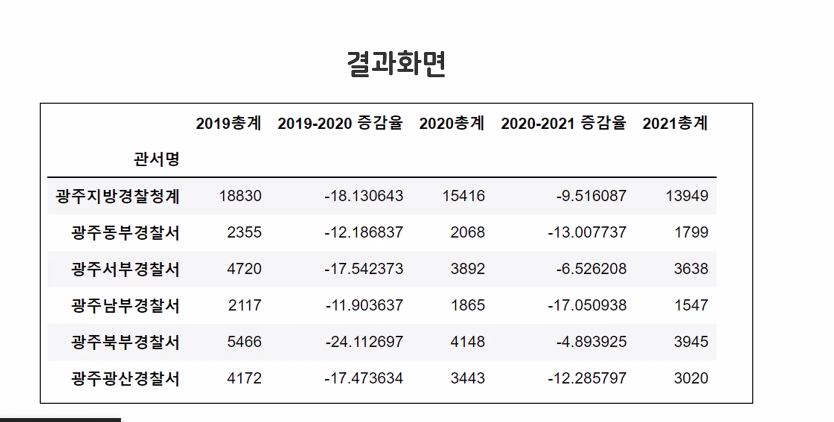

In [345]:
# 1.데이터 3개 불러오기
# index는 관서명, 각각 변수에 담기
data2019 = pd.read_csv("./2019.csv", index_col="관서명", encoding='euc-kr')
data2020 = pd.read_csv("./2020.csv", index_col="관서명", encoding='euc-kr')
data2021 = pd.read_csv("./2021.csv", index_col="관서명", encoding='euc-kr')

In [346]:
print()
print(data2019.index.unique())
print(data2020.index.unique())
print(data2021.index.unique())


Index(['광주지방경찰청계', '광주동부경찰서', '광주서부경찰서', '광주남부경찰서', '광주북부경찰서', '광주광산경찰서'], dtype='object', name='관서명')
Index(['광주지방경찰청계', '광주동부경찰서', '광주서부경찰서', '광주남부경찰서', '광주북부경찰서', '광주광산경찰서'], dtype='object', name='관서명')
Index(['광주지방경찰청계', '광주지방경찰청', '광주동부경찰서', '광주서부경찰서', '광주남부경찰서', '광주북부경찰서',
       '광주광산경찰서'],
      dtype='object', name='관서명')


In [347]:
# 데이터 체크
# 특정 연도에만 존재하는 컹찰청 있음 --> 경찰청 삭제
data2021.drop(["광주지방경찰청"], inplace=True)
print(data2021.index.unique())

Index(['광주지방경찰청계', '광주동부경찰서', '광주서부경찰서', '광주남부경찰서', '광주북부경찰서', '광주광산경찰서'], dtype='object', name='관서명')


In [348]:
# 연도별 데이터 총합 구하기 (총합 컬럼 생성)
a = data2019.iloc[:,1:].sum(axis=1)
b = data2020.iloc[:,1:].sum(axis=1)
c = data2021.iloc[:,1:].sum(axis=1)
data2019["총합"] = a
data2020["총합"] = b
data2021["총합"] = c
data2019

,구분,살인,강도,강간·강제추행,절도,폭력,총합
관서명,,,,,,,
광주지방경찰청계,발생건수,18,44,750,8425,9593,18830
광주지방경찰청계,검거건수,18,47,758,5409,8301,14533
광주지방경찰청계,검거인원,17,66,776,3433,11774,16066
광주지방경찰청계,구속,9,33,42,104,58,246
광주지방경찰청계,불구속,1,26,511,2781,5618,8937
광주지방경찰청계,기타,7,7,223,548,6098,6883
광주동부경찰서,발생건수,3,5,92,1100,1155,2355
광주동부경찰서,검거건수,4,6,86,583,970,1649
광주동부경찰서,검거인원,4,7,98,447,1483,2039


In [349]:
# 구분이 발생건수인 값들만 가져오기
# boolean 인덱싱
data2019[data2019["구분"] == "발생건수"]
# 5-1. '총합'컬럼만 데이터 가져오기 (Series 형태로 출력)
# 5-2. 각 연도별 총합 Sreies 데이터 이름 바꿔주기
# 2019총계, 2020총계, 2021총계
data1 = data2019[data2019["구분"] == "발생건수"].loc[:,"총합"]
data1.name= "2019총계"

data2 = data2020[data2020["구분"] == "발생건수"].loc[:,"총합"]
data2.name= "2020총계"

data3 = data2021[data2021["구분"] == "발생건수"].loc[:,"총합"]
data3.name= "2021총계"
# dataCrime = pd.concat([data1,data2,data3], axis=1)
# dataCrime

In [352]:
# 6. 증감률 계산
# (금년-작년) / 작년 * 100
# a = dataCrime.loc[:,"2019총계"]
# b = dataCrime.loc[:,"2020총계"]
# dataCrime["2019-2020증감률"] = (b-a)/a*100
a = (data2-data1)/data1*100
a.name = "2019-2020증감률"
b = (data3-data2)/data2*100
b.name = "2020-2021증감률"

In [343]:
# a = dataCrime.loc[:,"2020총계"]
# b = dataCrime.loc[:,"2021총계"]
# dataCrime["2020-2021증감률"] = (b-a)/a*100

# dataCrime

,2019총계,2020총계,2021총계,2019-2020증감률,2020-2021증감률
관서명,,,,,
광주지방경찰청계,18830,15416,13949,-18.130643,-9.516087
광주동부경찰서,2355,2068,1799,-12.186837,-13.007737
광주서부경찰서,4720,3892,3638,-17.542373,-6.526208
광주남부경찰서,2117,1865,1547,-11.903637,-17.050938
광주북부경찰서,5466,4148,3945,-24.112697,-4.893925
광주광산경찰서,4172,3443,3020,-17.473634,-12.285797


In [354]:
# 7. 데이터 프레임 병합하기

# dataCrime[["2019총계", "2019-2020증감률","2020총계","2020-2021증감률","2021총계"]]
resData = pd.concat([data1,a,data2,b,data3],axis=1)
resData


,2019총계,2019-2020증감률,2020총계,2020-2021증감률,2021총계
관서명,,,,,
광주지방경찰청계,18830,-18.130643,15416,-9.516087,13949
광주동부경찰서,2355,-12.186837,2068,-13.007737,1799
광주서부경찰서,4720,-17.542373,3892,-6.526208,3638
광주남부경찰서,2117,-11.903637,1865,-17.050938,1547
광주북부경찰서,5466,-24.112697,4148,-4.893925,3945
광주광산경찰서,4172,-17.473634,3443,-12.285797,3020


In [363]:
import numpy as np

In [364]:
bol = [True, False, True]
ind = np.array(bol)
list1 = ["가","나","다"]

list1[bol]

TypeError: list indices must be integers or slices, not list